In [3]:
!pip install seaborn

import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import seaborn as sns

import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/IrisData_full (1).csv', sep=',', low_memory = False)

df.head(10)

Mounted at /content/drive


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [9]:
np.random.seed(13)
df = df.sample(frac=1).reset_index(drop=True)
print("First 10 entries after shuffling: \n", df.head(10))

First 10 entries after shuffling: 
    5.1  3.5  1.4  0.2      Iris-setosa
0  6.3  3.3  4.7  1.6  Iris-versicolor
1  6.7  3.1  4.4  1.4  Iris-versicolor
2  4.6  3.6  1.0  0.2      Iris-setosa
3  7.1  3.0  5.9  2.1   Iris-virginica
4  5.7  2.5  5.0  2.0   Iris-virginica
5  4.9  3.1  1.5  0.1      Iris-setosa
6  6.3  3.4  5.6  2.4   Iris-virginica
7  6.7  3.3  5.7  2.1   Iris-virginica
8  4.6  3.2  1.4  0.2      Iris-setosa
9  6.1  3.0  4.6  1.4  Iris-versicolor


In [10]:
print("First 10 entries after shuffling: \n", df.head(10))

First 10 entries after shuffling: 
    5.1  3.5  1.4  0.2      Iris-setosa
0  6.3  3.3  4.7  1.6  Iris-versicolor
1  6.7  3.1  4.4  1.4  Iris-versicolor
2  4.6  3.6  1.0  0.2      Iris-setosa
3  7.1  3.0  5.9  2.1   Iris-virginica
4  5.7  2.5  5.0  2.0   Iris-virginica
5  4.9  3.1  1.5  0.1      Iris-setosa
6  6.3  3.4  5.6  2.4   Iris-virginica
7  6.7  3.3  5.7  2.1   Iris-virginica
8  4.6  3.2  1.4  0.2      Iris-setosa
9  6.1  3.0  4.6  1.4  Iris-versicolor


In [20]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Перевірка та виведення стовпців перед вибором
print("Стовпці в DataFrame: ", df.columns)

# Якщо є зайві пробіли в назвах стовпців, їх можна обрізати
df.columns = df.columns.str.strip()

# Вибір тільки числових параметрів, окрім останнього стовпця (ймовірно 'species')
features = df.iloc[:, :-1]  # 'species' - останній стовпець, тому його виключаємо

# Нормалізація параметрів
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(features)

# Створення нового DataFrame з нормалізованими даними та додаванням колонки 'species'
df_normalized = pd.DataFrame(df_normalized, columns=features.columns)

# Перевіряємо наявність стовпця 'species' перед додаванням
if 'species' in df.columns:
    df_normalized['species'] = df['species']
else:
    print("Стовпець 'species' не знайдено в DataFrame")

# Виведення перших 10 записів після нормалізації
print("Перші 10 записів після нормалізації:\n", df_normalized.head(10))


Стовпці в DataFrame:  Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')
Стовпець 'species' не знайдено в DataFrame
Перші 10 записів після нормалізації:
         5.1       3.5       1.4       0.2
0  0.555556  0.541667  0.627119  0.625000
1  0.666667  0.458333  0.576271  0.541667
2  0.083333  0.666667  0.000000  0.041667
3  0.777778  0.416667  0.830508  0.833333
4  0.388889  0.208333  0.677966  0.791667
5  0.166667  0.458333  0.084746  0.000000
6  0.555556  0.583333  0.779661  0.958333
7  0.666667  0.541667  0.796610  0.833333
8  0.083333  0.500000  0.067797  0.041667
9  0.500000  0.416667  0.610169  0.541667


In [21]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

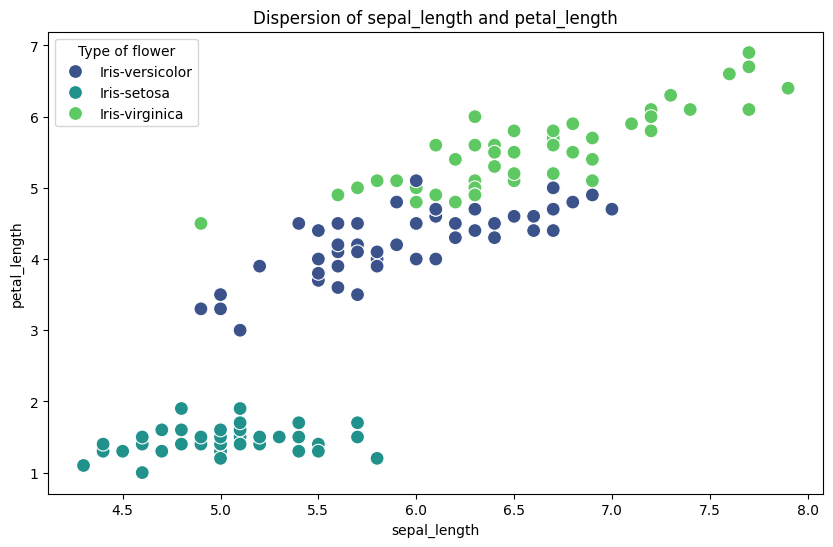

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

# Construction of a scatter plot

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='viridis', s=100)

plt.title('Dispersion of sepal_length and petal_length')

plt.xlabel('sepal_length')

plt.ylabel('petal_length')

plt.legend(title='Type of flower')

plt.show()

In [23]:
print(df.head())   # Review the first few lines

print(df.columns)   # Review the names of all columns

   sepal_length  sepal_width  petal_length  petal_width          species
0           6.3          3.3           4.7          1.6  Iris-versicolor
1           6.7          3.1           4.4          1.4  Iris-versicolor
2           4.6          3.6           1.0          0.2      Iris-setosa
3           7.1          3.0           5.9          2.1   Iris-virginica
4           5.7          2.5           5.0          2.0   Iris-virginica
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [24]:
df.columns = df.columns.str.strip()

Розмір навчальної вибірки: 119
Розмір тестової вибірки: 30


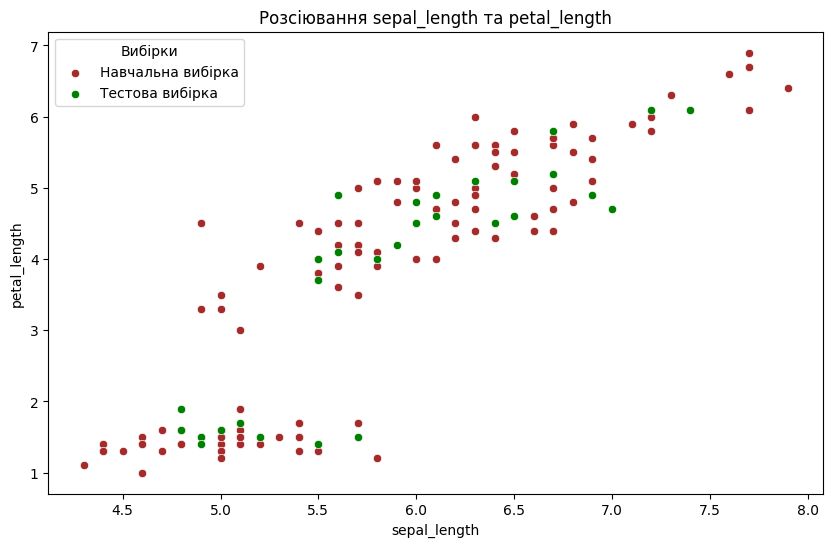

In [26]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Вибір фіч і таргету
x = df['sepal_length']
y = df['petal_length']

# Розбиття на навчальну і тестову вибірки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Виведення розміру вибірок
print("Розмір навчальної вибірки:", x_train.shape[0])
print("Розмір тестової вибірки:", x_test.shape[0])

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train, y=y_train, color='brown', label='Навчальна вибірка')
sns.scatterplot(x=x_test, y=y_test, color='green', label='Тестова вибірка')

plt.title('Розсіювання sepal_length та petal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(title='Вибірки')
plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Оголошення фіч та цільової змінної
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Нормалізація параметрів
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Перевірка наявності стовпця 'species'
if 'species' in df.columns:
    x = df[features]
    y = df['species']
else:
    print("Стовпець 'species' не знайдено в DataFrame")
    # Можна зупинити виконання, якщо немає стовпця 'species'
    exit()

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Пошук найкращого значення K
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Тренування моделі
    knn.fit(X_train, y_train)

    # Прогнозування
    y_pred = knn.predict(X_test)

    # Обчислення точності
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((k, accuracy))
    print(f"Точність для K={k}: {accuracy:.4f}")

# Знаходження найкращого значення K
best_k = max(accuracies, key=lambda x: x[1])[0]
print(f"Найкраще значення K: {best_k}")


Точність для K=1: 0.9333
Точність для K=2: 0.9111
Точність для K=3: 0.9333
Точність для K=4: 0.9333
Точність для K=5: 0.9333
Точність для K=6: 0.9333
Точність для K=7: 0.9333
Точність для K=8: 0.9333
Точність для K=9: 0.9333
Точність для K=10: 0.9333
Точність для K=11: 0.9556
Точність для K=12: 0.9556
Точність для K=13: 0.9556
Точність для K=14: 0.9333
Точність для K=15: 0.9333
Найкраще значення K: 11


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Перевірка наявності всіх стовпців
print("Стовпці в DataFrame:", df.columns)

# Якщо є зайві пробіли або інші символи у назвах стовпців, їх можна обрізати
df.columns = df.columns.str.strip()

# Оголошення фіч та цільової змінної
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Перевіримо, чи є всі фічі в DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Відсутні стовпці: {missing_features}")
    exit()

# Нормалізація параметрів
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Перевірка наявності стовпця 'species'
if 'species' in df.columns:
    x = df[features]
    y = df['species']
else:
    print("Стовпець 'species' не знайдено в DataFrame")
    print("Ось назви всіх стовпців DataFrame:")
    print(df.columns)
    exit()

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Пошук найкращого значення K
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Тренування моделі
    knn.fit(X_train, y_train)

    # Прогнозування
    y_pred = knn.predict(X_test)

    # Обчислення точності
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((k, accuracy))
    print(f"Точність для K={k}: {accuracy:.4f}")

# Знаходження найкращого значення K
best_k = max(accuracies, key=lambda x: x[1])[0]
print(f"Найкраще значення K: {best_k}")


Стовпці в DataFrame: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Точність для K=1: 0.9333
Точність для K=2: 0.9111
Точність для K=3: 0.9333
Точність для K=4: 0.9333
Точність для K=5: 0.9333
Точність для K=6: 0.9333
Точність для K=7: 0.9333
Точність для K=8: 0.9333
Точність для K=9: 0.9333
Точність для K=10: 0.9333
Точність для K=11: 0.9556
Точність для K=12: 0.9556
Точність для K=13: 0.9556
Точність для K=14: 0.9333
Точність для K=15: 0.9333
Найкраще значення K: 11


Size of training sample: 119
Size of test sample: 30


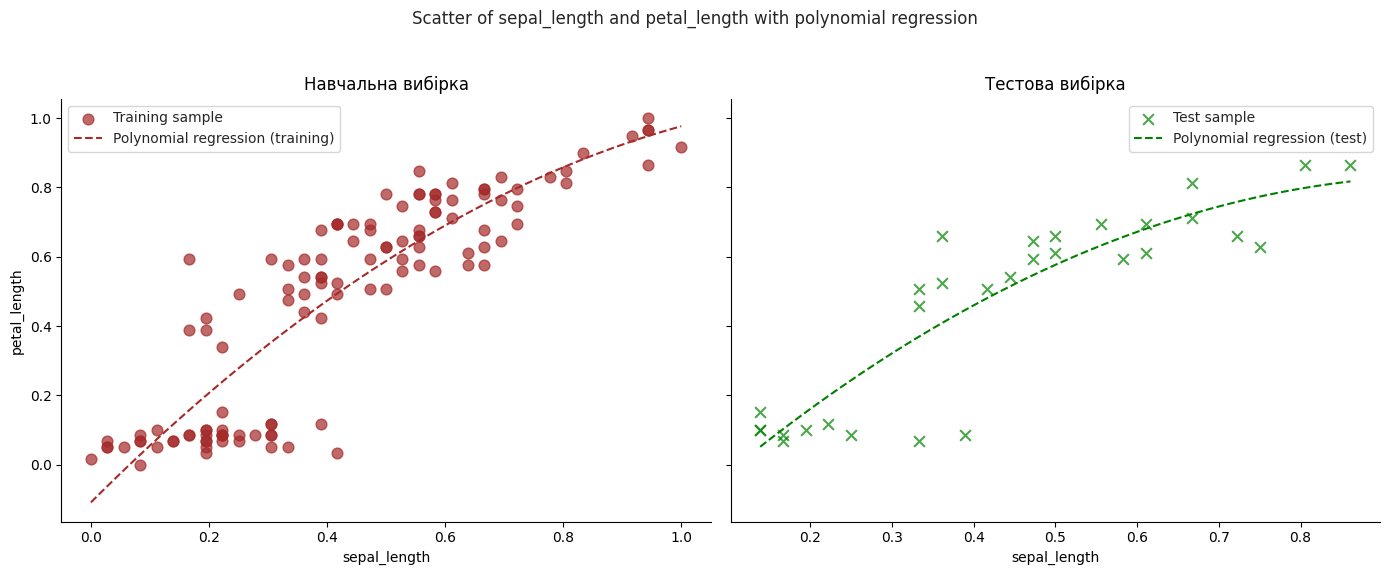

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Select signs and labels
X = df['sepal_length']
y = df['petal_length']

# We divide into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output of sample sizes
print("Size of training sample:", X_train.shape[0])
print("Size of test sample:", X_test.shape[0])

# Subgraphs for training and test samples
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.set_style("ticks")

# Plot of the training sample with polynomial regression
axs[0].scatter(X_train, y_train, color='brown', label='Training sample', s=60, marker="o", alpha=0.7)

p_train = Polynomial.fit(X_train, y_train, deg=2) # Polynomial regression of the 2nd degree
axs[0].plot(*p_train.linspace(), color="brown", linestyle="--", label="Polynomial regression (training)")
axs[0].set_title('Навчальна вибірка')  # Виправлено
axs[0].set_xlabel('sepal_length')
axs[0].set_ylabel('petal_length')
axs[0].legend()

# Graph of the test sample with polynomial regression
axs[1].scatter(X_test, y_test, color='green', label='Test sample', s=60, marker="x", alpha=0.7)

p_test = Polynomial.fit(X_test, y_test, deg=2) # Polynomial regression of the 2nd degree
axs[1].plot(*p_test.linspace(), color="green", linestyle="--", label="Polynomial regression (test)")
axs[1].set_title('Тестова вибірка')  # Виправлено
axs[1].set_xlabel('sepal_length')
axs[1].legend()

# Additional settings
plt.suptitle('Scatter of sepal_length and petal_length with polynomial regression')  # Виправлено
sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [37]:
best_k = max(accuracies, key=lambda x: x[1])[0]

print (f"Best value of K: {best_k}")

Best value of K: 11
